# Assignment 3

# Problem 3

In this problem you will be working with the Olivetti Faces Dataset in order to explore the use of PCA in dimensionality reduction.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
import logging
from time import time

from numpy.random import RandomState
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import MiniBatchKMeans
from sklearn import decomposition


The Olivetti Faces dataset consists of 400 faces that are each (64, 64) images


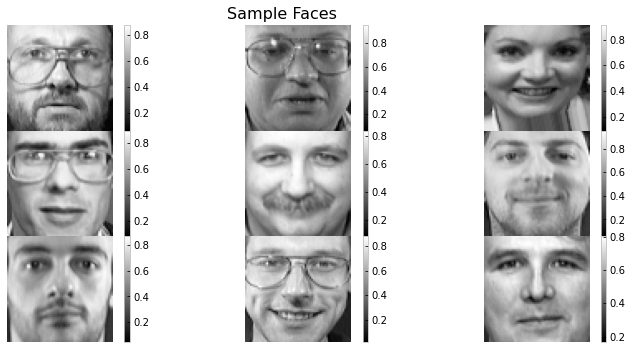

In [9]:
from sklearn.datasets import fetch_olivetti_faces

n_row, n_col = 3, 3
image_shape = (64, 64)

olivetti_dataset = fetch_olivetti_faces(shuffle=True)


The Olivetti Faces dataset consists of 400 faces that are each (64, 64) images


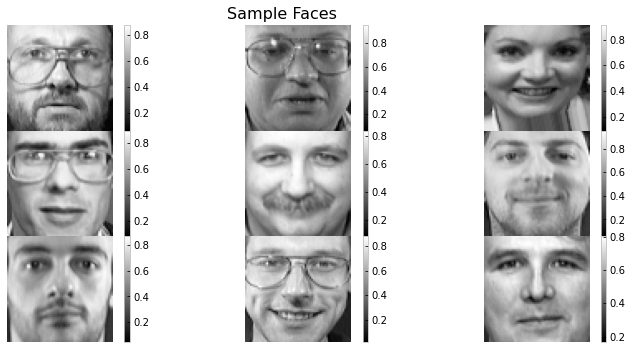

In [13]:
faces = olivetti_dataset.data
n_samples, n_features = faces.shape

print(f'The Olivetti Faces dataset consists of {n_samples} faces that are each {image_shape} images')

def plot_faces(title, images, n_col=n_col, n_row=n_row):
    plt.figure(figsize=(10,5))
    plt.suptitle(title, size=16)
    for idc, image in enumerate(images):
        plt.subplot(n_row, n_col, idc + 1)
        image = image.reshape(image_shape)
        plt.imshow(image, cmap='gray')
        plt.colorbar(); plt.axis('off');
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)
    
plot_faces("Sample Faces", faces[:9,:])

Dataset consists of 400 faces
Extracting the top 6 Eigenfaces - PCA using randomized SVD...
done in 0.065s
Extracting the top 6 Non-negative components - NMF...
done in 0.110s
Extracting the top 6 Independent components - FastICA...


/home/jacob/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


done in 0.150s
Extracting the top 6 Sparse comp. - MiniBatchSparsePCA...
done in 0.656s
Extracting the top 6 MiniBatchDictionaryLearning...
done in 0.375s
Extracting the top 6 Cluster centers - MiniBatchKMeans...
done in 0.100s
Extracting the top 6 Factor Analysis components - FA...
done in 0.252s


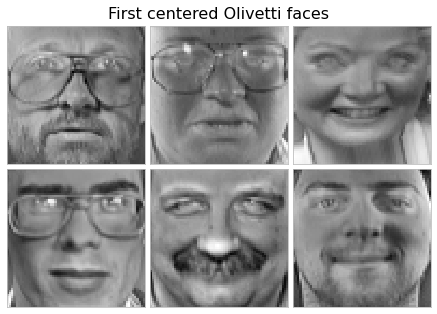

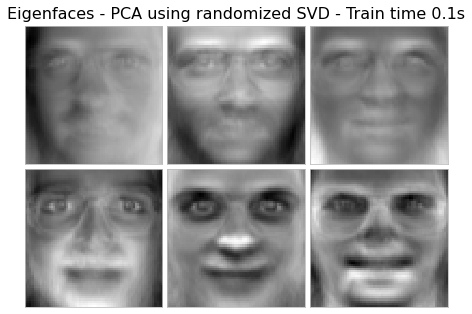

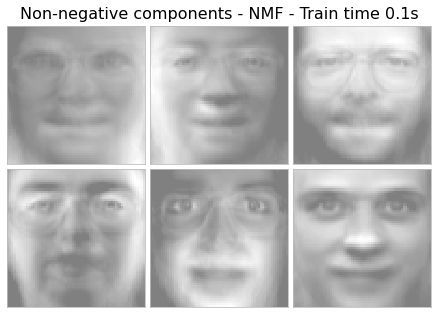

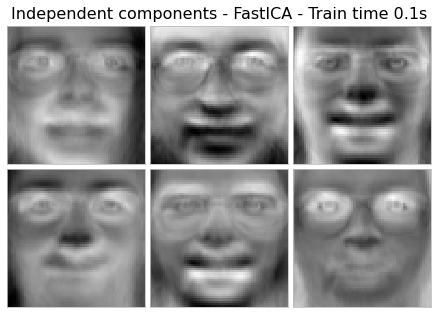

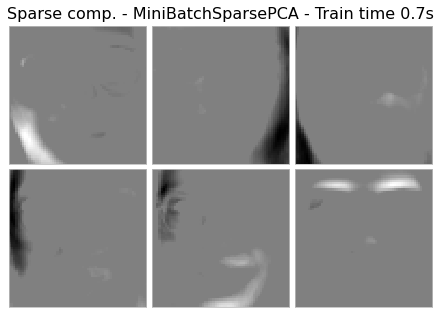

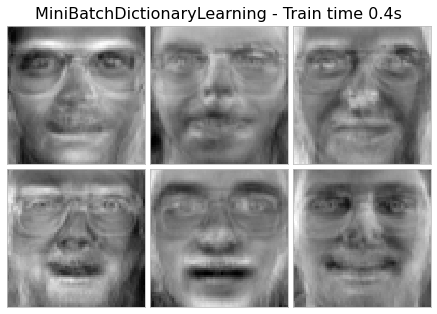

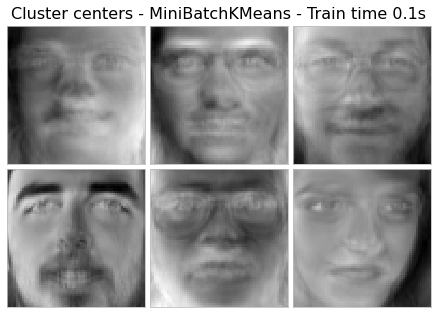

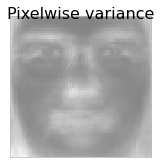

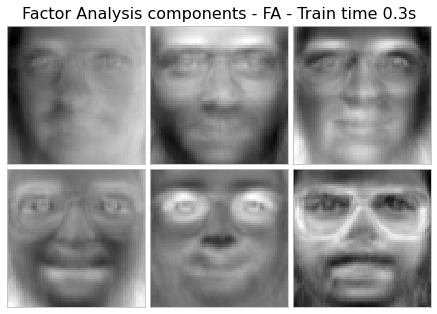

Extracting the top 6 Dictionary learning...
done in 0.395s
Extracting the top 6 Dictionary learning - positive dictionary...
done in 0.384s
Extracting the top 6 Dictionary learning - positive code...
done in 0.119s
Extracting the top 6 Dictionary learning - positive dictionary & code...
done in 0.164s


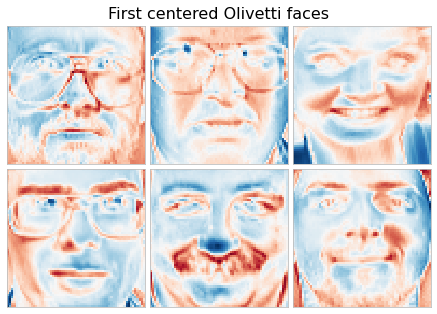

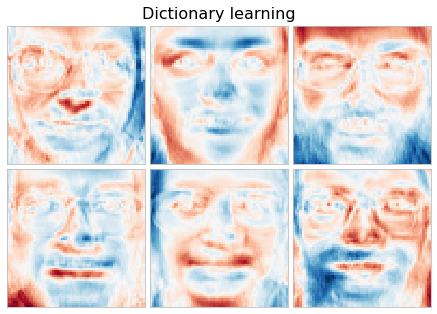

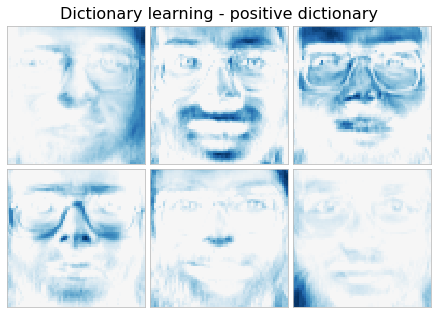

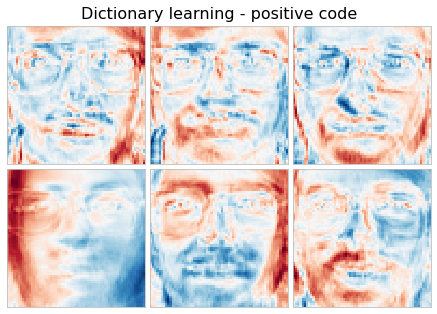

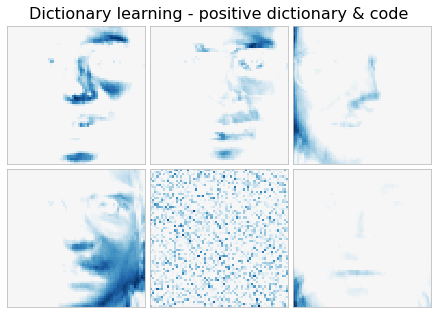

In [15]:
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format="%(asctime)s %(levelname)s %(message)s")
n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)
rng = RandomState(0)

# #############################################################################
# Load faces data
#faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=rng)
n_samples, n_features = faces.shape

# global centering
faces_centered = faces - faces.mean(axis=0)

# local centering
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("Dataset consists of %d faces" % n_samples)


def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    plt.figure(figsize=(2.0 * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(
            comp.reshape(image_shape),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax=vmax,
        )
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.0)


# #############################################################################
# List of the different estimators, whether to center and transpose the
# problem, and whether the transformer uses the clustering API.
estimators = [
    (
        "Eigenfaces - PCA using randomized SVD",
        decomposition.PCA(
            n_components=n_components, svd_solver="randomized", whiten=True
        ),
        True,
    ),
    (
        "Non-negative components - NMF",
        decomposition.NMF(n_components=n_components, init="nndsvda", tol=5e-3),
        False,
    ),
    (
        "Independent components - FastICA",
        decomposition.FastICA(n_components=n_components, whiten=True),
        True,
    ),
    (
        "Sparse comp. - MiniBatchSparsePCA",
        decomposition.MiniBatchSparsePCA(
            n_components=n_components,
            alpha=0.8,
            n_iter=100,
            batch_size=3,
            random_state=rng,
        ),
        True,
    ),
    (
        "MiniBatchDictionaryLearning",
        decomposition.MiniBatchDictionaryLearning(
            n_components=15, alpha=0.1, n_iter=50, batch_size=3, random_state=rng
        ),
        True,
    ),
    (
        "Cluster centers - MiniBatchKMeans",
        MiniBatchKMeans(
            n_clusters=n_components,
            tol=1e-3,
            batch_size=20,
            max_iter=50,
            random_state=rng,
        ),
        True,
    ),
    (
        "Factor Analysis components - FA",
        decomposition.FactorAnalysis(n_components=n_components, max_iter=20),
        True,
    ),
]


# #############################################################################
# Plot a sample of the input data

plot_gallery("First centered Olivetti faces", faces_centered[:n_components])

# #############################################################################
# Do the estimation and plot it

for name, estimator, center in estimators:
    print("Extracting the top %d %s..." % (n_components, name))
    t0 = time()
    data = faces
    if center:
        data = faces_centered
    estimator.fit(data)
    train_time = time() - t0
    print("done in %0.3fs" % train_time)
    if hasattr(estimator, "cluster_centers_"):
        components_ = estimator.cluster_centers_
    else:
        components_ = estimator.components_

    # Plot an image representing the pixelwise variance provided by the
    # estimator e.g its noise_variance_ attribute. The Eigenfaces estimator,
    # via the PCA decomposition, also provides a scalar noise_variance_
    # (the mean of pixelwise variance) that cannot be displayed as an image
    # so we skip it.
    if (
        hasattr(estimator, "noise_variance_") and estimator.noise_variance_.ndim > 0
    ):  # Skip the Eigenfaces case
        plot_gallery(
            "Pixelwise variance",
            estimator.noise_variance_.reshape(1, -1),
            n_col=1,
            n_row=1,
        )
    plot_gallery(
        "%s - Train time %.1fs" % (name, train_time), components_[:n_components]
    )

plt.show()

# #############################################################################
# Various positivity constraints applied to dictionary learning.
estimators = [
    (
        "Dictionary learning",
        decomposition.MiniBatchDictionaryLearning(
            n_components=15, alpha=0.1, n_iter=50, batch_size=3, random_state=rng
        ),
        True,
    ),
    (
        "Dictionary learning - positive dictionary",
        decomposition.MiniBatchDictionaryLearning(
            n_components=15,
            alpha=0.1,
            n_iter=50,
            batch_size=3,
            random_state=rng,
            positive_dict=True,
        ),
        True,
    ),
    (
        "Dictionary learning - positive code",
        decomposition.MiniBatchDictionaryLearning(
            n_components=15,
            alpha=0.1,
            n_iter=50,
            batch_size=3,
            fit_algorithm="cd",
            random_state=rng,
            positive_code=True,
        ),
        True,
    ),
    (
        "Dictionary learning - positive dictionary & code",
        decomposition.MiniBatchDictionaryLearning(
            n_components=15,
            alpha=0.1,
            n_iter=50,
            batch_size=3,
            fit_algorithm="cd",
            random_state=rng,
            positive_dict=True,
            positive_code=True,
        ),
        True,
    ),
]


# #############################################################################
# Plot a sample of the input data

plot_gallery(
    "First centered Olivetti faces", faces_centered[:n_components], cmap=plt.cm.RdBu
)

# #############################################################################
# Do the estimation and plot it

for name, estimator, center in estimators:
    print("Extracting the top %d %s..." % (n_components, name))
    t0 = time()
    data = faces
    if center:
        data = faces_centered
    estimator.fit(data)
    train_time = time() - t0
    print("done in %0.3fs" % train_time)
    components_ = estimator.components_
    plot_gallery(name, components_[:n_components], cmap=plt.cm.RdBu)

plt.show()

1. Use PCA to find 9 eigenvectors that correspond to the largest eigenvalues of the covariance matrix (principal components or eigenfaces). Describe what the 9 principal components represent and plot them. Hint: Feel free to use libraries to complete this task. Highly recomend looking into sklearn PCA.

2. Reconstruct the first 9 face images using the 9 principal components.

3. Compute the minimum number of principal components needed to cover 95% of the eigenspace.

4. Reconstruct the first 9 face images using the number of principal components computed in part 3.

5. Take a picture of yourself and format it as a 64 x 64, black and white image. Repeat part 4 for the image of yourself.